<a href="https://colab.research.google.com/github/zabihin/Bloc1_Project_Kayak/blob/main/Bloc2_Speed_Dating_Zahra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

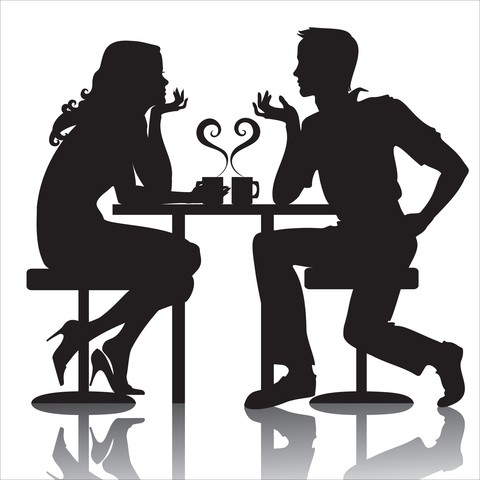












##About dataset:
Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.
This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset
](https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment)



Import libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load Dataset

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Speed Dating Data.csv" , encoding="ISO-8859-1")
df=data.copy()

#Part I: Data Exploration 




In [ ]:
data.shape

(8378, 195)

In [ ]:
#Dataset quick look
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("The number of unique  id is",data['iid'].nunique())

The number of unique  id is 551


In [ ]:
#missing values
print(data.isnull().mean().round(4).mul(100).sort_values(ascending=False))


num_in_3    92.03
numdat_3    82.14
expnum      78.52
sinc7_2     76.67
amb7_2      76.67
            ...  
wave         0.00
condtn       0.00
idg          0.00
gender       0.00
dec          0.00
Length: 195, dtype: float64


In [ ]:
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.loc[missing_data['Missing Ratio'] <20]


,Missing Ratio
match_es,14.000955
shar_o,12.843161
shar,12.735736
zipcode,12.699928
numdat_2,11.279542
...,...
race_o,0.871330
field,0.751969
race,0.751969
pid,0.119360


#Part II: Data Visualization & Data Analyse

##Gender

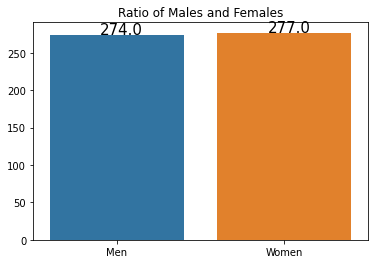

In [ ]:
women_n = (data.groupby('iid')['gender'].min() == 0).sum()
men_n = (data.groupby('iid')['gender'].min() == 1).sum()

# plot data
ax=sns.barplot(x=['Men', 'Women'], y=[women_n,men_n])


ax.set_title("Ratio of Males and Females")
for i in ax.patches:
    ax.text(i.get_x() +0.3, i.get_height()+0.4,str(round((i.get_height()), 1)),fontsize = 15)


- The dataset is well balanced between males and females


## Age distribution of participants


Text(0, 0.5, 'Count')

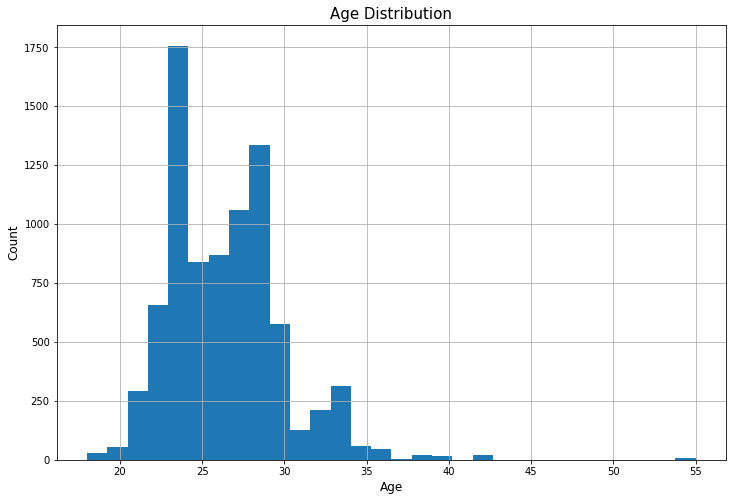

In [ ]:
ax = data.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age',fontsize=12)
ax.set_ylabel('Count', fontsize=12)


- Most of the people are between 21 and 30 years old

0: woman, 1: man


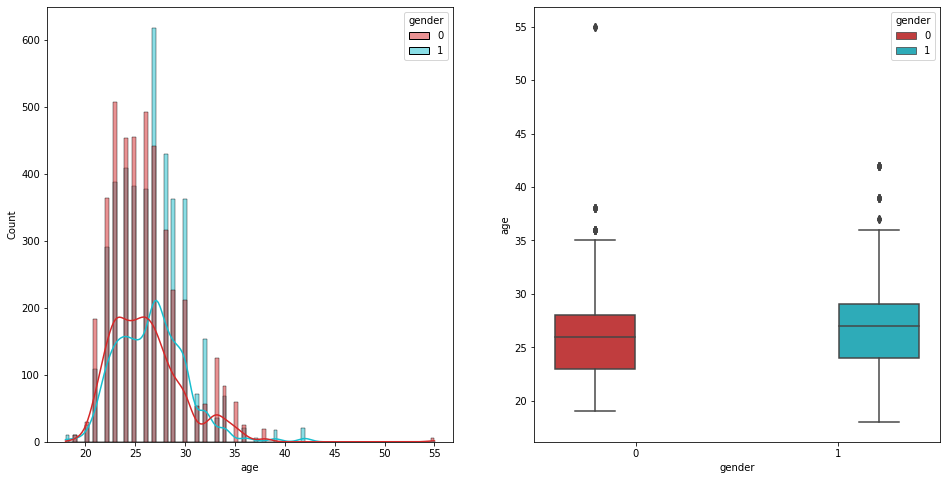

In [ ]:
# color palette as dictionary
palette = {1:"tab:cyan",
           0:"tab:red"}
figure, axes = plt.subplots(1, 2, figsize=(16,8))
sns.histplot(data=data, x="age",  hue="gender", ax=axes[0], kde=True, palette=palette);
sns.boxplot(data=data, x="gender", y="age", hue='gender', ax=axes[1], palette=palette);
print(f'0: woman, 1: man')

In [ ]:
data['gender'].replace({0 : 'Woman' , 1 : 'Man'},inplace = True)



Female participants are in average younger than male participants




##Race distribution

In [ ]:
data["race"] = data["race"].apply(lambda x: 'Black/African American' if x == 1
                                  else 'European/Caucasian-American' if x == 2
                                  else 'Latino/Hispanic American' if x == 3
                                  else 'Asian/Pacific Islander/Asian-Americann' if x == 4
                                  else 'Native American' if x == 5
                                   else 'Other'
                                         )

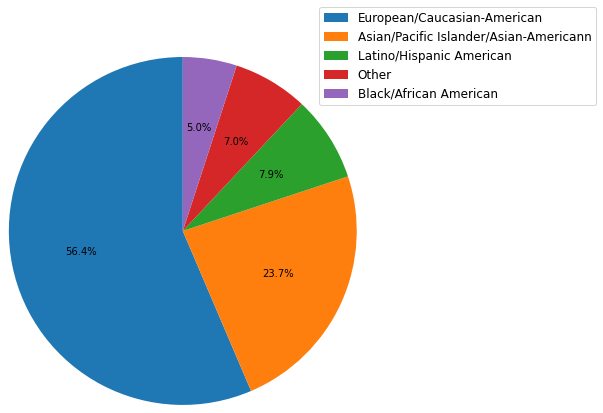

In [ ]:
races = data["race"].value_counts()

plt.figure()
plt.pie(races.values, labels=['','','','',''],
       autopct='%1.1f%%',
       startangle=90,
       radius=2
       )
plt.legend(labels = races.index, bbox_to_anchor=(1.1, 1.05), fontsize='large')
plt.show()

imprace:
How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


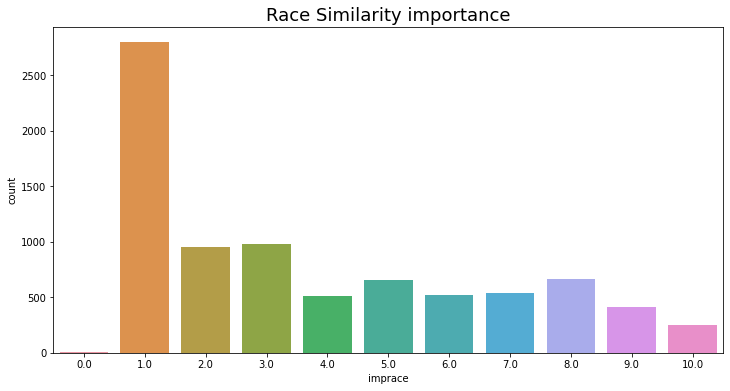

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Race Similarity importance" , fontsize=18)
sns.countplot(data['imprace'])
plt.show()

 The most of people did not give more importance to belonging to the same race 

##Religion


imprelig:
 How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


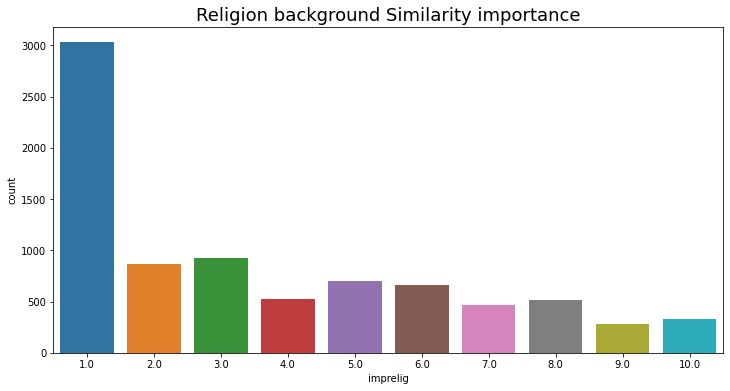

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Religion background Similarity importance" , fontsize=18)
sns.countplot(data['imprelig'])
plt.show()


Religion was not important in the choice of the major part of the participants

How many participants got match?


In [ ]:
data.groupby('iid')['match'].max().mean()


0.8203266787658802

82.03% of the participants got at least one match.

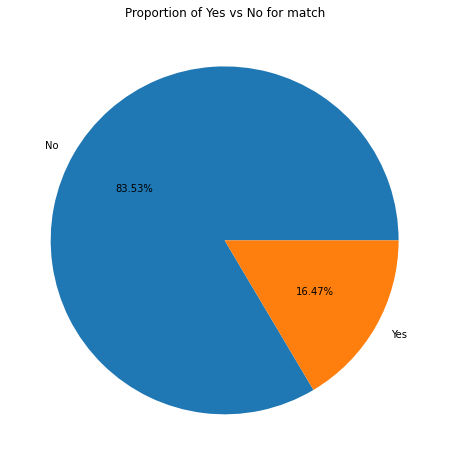

In [ ]:
data['match'].replace({0 : 'No' , 1 : 'Yes'},inplace = True)

match = data['match'].value_counts(dropna=False)
plt.figure(figsize=(12,8))
plt.pie(match.values, labels = match.index, autopct = "%.2f%%")
plt.title("Proportion of Yes vs No for match")
plt.show()

In [ ]:
data["goal"] = data["goal"].apply(lambda x: 'Seemed like a fun night out' if x == 1
                                  else 'To meet new people' if x == 2
                                  else 'To get a date' if x == 3
                                  else 'Looking for a serious relationship' if x == 4
                                  else 'To say I did it' if x == 5
                                   else 'Other'
                                         )

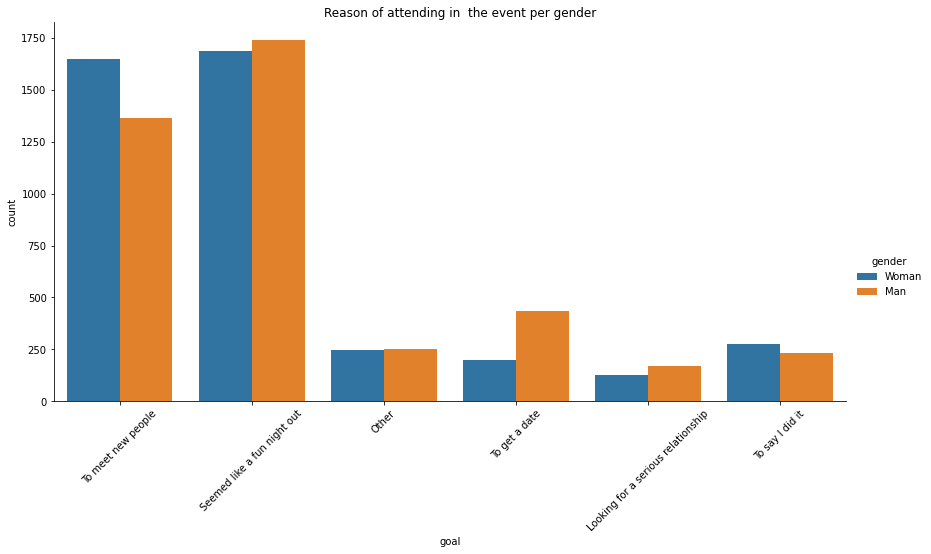

In [ ]:
ax = sns.catplot(data = data, x='goal', kind ='count', hue = 'gender', height = 6, aspect = 2)
ax.set_xticklabels(rotation=45)
ax.fig.suptitle('Reason of attending in  the event per gender', y = 1.01)
plt.show()


Most of participants came for a fun night out.

In [ ]:
corr = df[df.columns].corr()
variables = list((corr[abs(corr["match"]) > 0.15]).index)
variables

['match',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'shar_o',
 'like_o',
 'prob_o',
 'dec',
 'attr',
 'sinc',
 'intel',
 'fun',
 'shar',
 'like',
 'prob',
 'them_cal',
 'num_in_3']

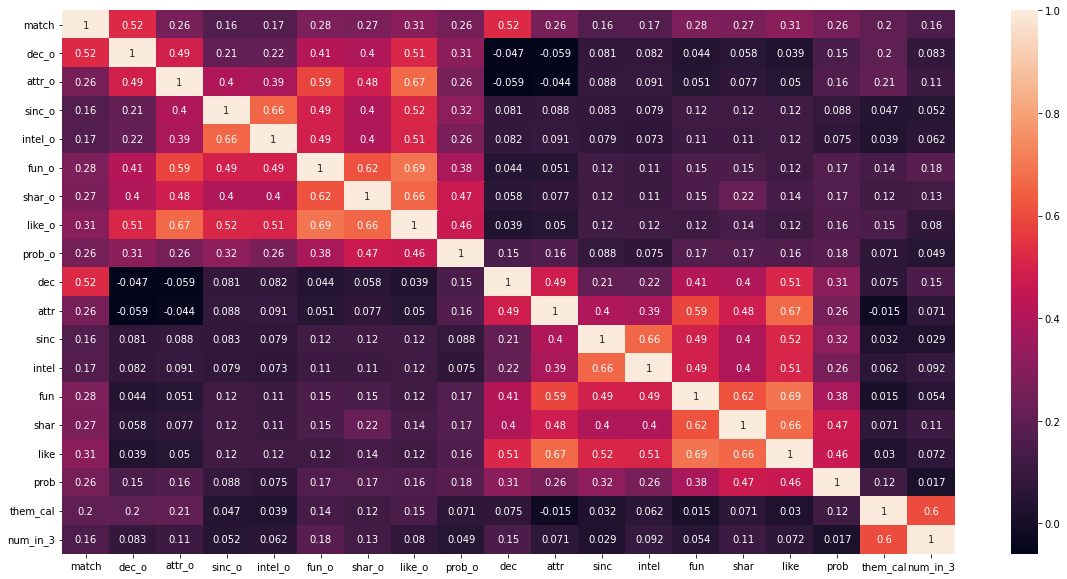

In [ ]:
corr_2 = df[variables].corr()
plt.figure(figsize = (20, 10))
sns.heatmap(data = corr_2, annot = True)

In [ ]:
#Mean of points assigned to each attribute
attr_lookfor = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
preferences_df = data.groupby(['gender'], as_index=False)[attr_lookfor].mean()
preferences_df = pd.melt(preferences_df, id_vars="gender", var_name="attribute", value_name="means")
preferences_df['attribute'] = preferences_df['attribute']
preferences_df['attribute'].replace({"attr1_1" :'attractive' , "sinc1_1" : 'sincere',"intel1_1":'intelligent',"fun1_1":"fun","amb1_1":"ambitious","shar1_1":"shared interests"},inplace = True)


0: Female, 1: Male


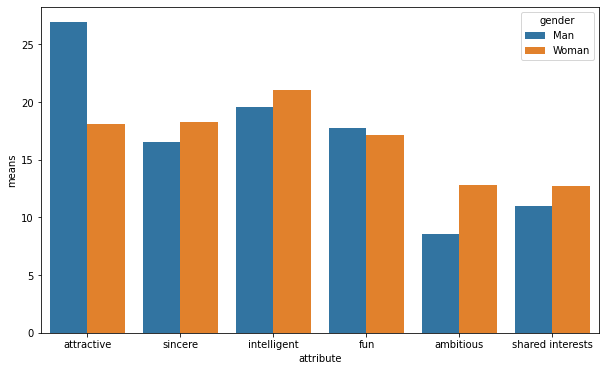

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=preferences_df, x='attribute', y='means', hue='gender');
print(f'0: Female, 1: Male')

On average, Male participants gave more weight to female attractiveness and less importance to shared interests
For Female participants the weights are more evenly distributed, where intelligence was ranked with more points, followed closely by sincerety

In [ ]:
data["field_cd"] = data["field_cd"].apply(lambda x: 'Law' if x == 1
                                          else 'Math' if x == 2
                                          else 'Social Science, Psychologist' if x == 3
                                          else 'Medical Science, Pharmaceuticals, and Bio Tech' if x == 4
                                          else 'Engineering' if x == 5
                                          else 'English/Creative Writing/ Journalism' if x == 6
                                          else 'History/Religion/Philosophy' if x == 7
                                          else 'Business/Econ/Finance' if x == 8
                                          else 'Education, Academia' if x == 9
                                          else 'Biological Sciences/Chemistry/Physics' if x == 10
                                          else 'Social Work' if x == 11
                                          else 'Undergrad/undecided' if x == 12
                                          else 'Political Science/International Affairs' if x == 13
                                          else 'Film' if x == 14
                                          else 'Fine Arts/Arts Administration' if x == 15
                                          else 'Languages' if x == 16
                                          else 'Architecture' if x == 17
                                          else 'Other'
                                         )

In [ ]:
data["date"] = data["date"].apply(lambda x: 'Several times a week' if x == 1
                                  else 'Twice a week' if x == 2
                                  else 'Once a week' if x == 3
                                  else 'Twice a month' if x == 4
                                  else 'Once a month' if x == 5
                                  else 'Several times a year' if x == 6
                                   else 'Almost never'
                                         )

In [ ]:
data["go_out"] = data["go_out"].apply(lambda x: 'Several times a week' if x == 1
                                  else 'Twice a week' if x == 2
                                  else 'Once a week' if x == 3
                                  else 'Twice a month' if x == 4
                                  else 'Once a month' if x == 5
                                  else 'Several times a year' if x == 6
                                   else 'Almost never'
                                         )

In [ ]:
data["career_c"] = data["career_c"].apply(lambda x: 'Lawyer' if x == 1
                                          else 'Academic/Research' if x == 2
                                          else 'Psychologist' if x == 3
                                          else 'Doctor/Medicine' if x == 4
                                          else 'Engineer' if x == 5
                                          else 'Creative Arts/Entertainment' if x == 6
                                          else 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin' if x == 7
                                          else 'Real Estate' if x == 8
                                          else 'International/Humanitarian Affairs' if x == 9
                                          else 'Undecided' if x == 10
                                          else 'Social Work' if x == 11
                                          else 'Speech Pathology' if x == 12
                                          else 'Politics' if x == 13
                                          else 'Pro sports/Athletics' if x == 14
                                          else 'Other' if x == 15
                                          else 'Journalism' if x == 16
                                          else 'Architecture'
                                         )